# Specific Model-New Dataset

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import shutil
import os

from tensorflow import keras
from keras.models import load_model
from pycm import ConfusionMatrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from imblearn.metrics import classification_report_imbalanced
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

In [3]:
# Remove file of Squamous Cell Carcinoma from Train and Test files as this class is not in the training model 
shutil.rmtree(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma')
shutil.rmtree(r'Skin cancer ISIC The International Skin Imaging Collaboration\Test\squamous cell carcinoma')

In [4]:
# Copy the images of the Seborrheic Keratosis of the test file into the Pigmented Bening keratosis of the train file.
for i in range(803,810):
    try:
        source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\seborrheic keratosis\ISIC_0010"+str(i)+".jpg"
        destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis'
        shutil.copy(source, destination)
    except:
        continue

In [5]:
# Copy the images of the Seborrheic Keratosis into the Pigmented Bening keratosis of the train file.
for i in range(10812,11194):
    try:
        source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\ISIC_00"+str(i)+".jpg"
        destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis'
        shutil.copy(source, destination)
    except:
        continue

In [6]:
# Copy the images of the Acnitic Keratosis of the test file to train file.
for i in range(10512,25606):
    try:
        source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_00"+str(i)+".jpg"
        destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis'
        shutil.copy(source, destination)
    except:
        continue

In [7]:
# Copy the images of the Basal Cell Carcinoma of the test file to train file.
for i in range(24331,24473):
    try:
        source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\basal cell carcinoma\ISIC_00"+str(i)+".jpg"
        destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma'
        shutil.copy(source, destination)
    except:
        continue

In [8]:
# Copy the images of the Dermatofibroma of the test file to train file.
for i in range(1114,25155):
    if i<1131:
        try:
            source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\dermatofibroma\ISIC_000"+str(i)+".jpg"
            destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma'
            shutil.copy(source, destination)
        except:
                continue
    else:
        try:
            source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\dermatofibroma\ISIC_00"+str(i)+".jpg"
            destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma'
            shutil.copy(source, destination)
        except:
                continue

In [9]:
# Copy the images of the Melanoma of the test file to train file.
for i in range(2,57):
    if i<10:
        try:
            source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\melanoma\ISIC_000000"+str(i)+".jpg"
            destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma'
            shutil.copy(source, destination)
        except:
                continue
    else:
        try:
            source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\melanoma\ISIC_00000"+str(i)+".jpg"
            destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma'
            shutil.copy(source, destination)
        except:
                continue

In [10]:
# Copy the images of the Pigmented Benign Keratosis of the test file to train file.
for i in range(312,427):
    try:
        source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\pigmented benign keratosis\ISIC_0024"+str(i)+".jpg"
        destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis'
        shutil.copy(source, destination)
    except:
        continue

In [11]:
# Copy the images of the Vascular Lesion of the test file to train file.
for i in range(370,403):
    try:
        source = r"Skin cancer ISIC The International Skin Imaging Collaboration\Test\vascular lesion\ISIC_0024"+str(i)+".jpg"
        destination = r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion'
        shutil.copy(source, destination)
    except:
        continue

In [12]:
# Delete the test file
shutil.rmtree(r'Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [13]:
# Delete the seborrheic keratosis file from train file
shutil.rmtree(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis')

In [14]:
# Rename the files so that the images have the same class names as the one used to train the model:
os.rename(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis', r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\akiec')
os.rename(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma', r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\bcc')
os.rename(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma', r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\df')
os.rename(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma', r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\mel')
os.rename(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus', r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\nv')
os.rename(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis', r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\bkl')
os.rename(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion', r'Skin cancer ISIC The International Skin Imaging Collaboration\Train\vasc')

In [15]:
# Rename the train file to test file 
os.rename(r'Skin cancer ISIC The International Skin Imaging Collaboration\Train', r'Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [1]:
test_path = 'Skin cancer ISIC The International Skin Imaging Collaboration\Test'

In [24]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224),classes=['akiec', 'bcc','df','mel','nv','bkl','vasc'],batch_size=10, shuffle=True)

Found 2143 images belonging to 7 classes.


In [25]:
imgs, labels = next(test_batches)

## Initial Model

### Running saved model on new data 

In [26]:
######################################################### Create function to calculate f1 score to use in model assessment
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [27]:
basic_model = load_model('my_model1', custom_objects={'get_f1':get_f1})

In [ ]:
predictions = basic_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

### Model Assesment

In [15]:
y_true_index=test_batches.classes
y_pred_index=np.argmax(predictions, axis=-1)

In [16]:
cm = confusion_matrix(y_true=y_true_index, y_pred=y_pred_index)
cm

array([[  0,   3,   1,  13,  27,  12,  74],
       [  0,  11,  10,  29,  59,  58, 225],
       [  0,   0,   2,   8,  15,  15,  71],
       [  0,  12,   7,  31,  58,  66, 280],
       [  2,   3,   9,  17,  62,  57, 207],
       [  2,   6,   9,  43,  96,  82, 319],
       [  1,   4,   2,  12,  23,  21,  79]], dtype=int64)

In [17]:
cm = ConfusionMatrix(actual_vector=y_true_index,predict_vector=y_pred_index)
print(cm)

Predict   0         1         2         3         4         5         6         
Actual
0         0         3         1         13        27        12        74        

1         0         11        10        29        59        58        225       

2         0         0         2         8         15        15        71        

3         0         12        7         31        58        66        280       

4         2         3         9         17        62        57        207       

5         2         6         9         43        96        82        319       

6         1         4         2         12        23        21        79        





Overall Statistics : 

95% CI                                                            (0.11061,0.13857)
ACC Macro                                                         0.74988
ARI                                                               -0.00028
AUNP                                                              0.50142
AUNU

                   pre       rec       spe        f1       geo       iba       sup

      akiec       0.00      0.00      1.00      0.00      0.00      0.00       130
        bcc       0.28      0.03      0.98      0.05      0.17      0.02       392
         df       0.05      0.02      0.98      0.03      0.13      0.02       111
        mel       0.20      0.07      0.93      0.10      0.25      0.06       454
         nv       0.18      0.17      0.84      0.18      0.38      0.14       357
        bkl       0.26      0.15      0.86      0.19      0.35      0.12       557
       vasc       0.06      0.56      0.41      0.11      0.48      0.23       142

avg / total       0.20      0.12      0.88      0.12      0.28      0.09      2143



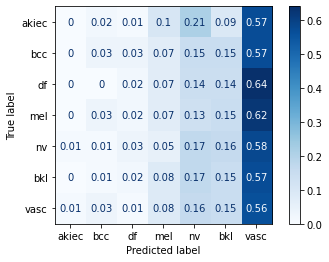

In [18]:
################################################################### Generate a classification report
classes = ['akiec', 'bcc', 'df', 'mel', 'nv','bkl', 'vasc']
report = classification_report_imbalanced(y_true_index, y_pred_index, target_names=classes)
print(report)

#################################################################### Generate Confusion matrix
cm = confusion_matrix(y_true_index, y_pred_index,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = np.round(cm,2), display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Tuned Model

### Running saved model in new data

In [26]:
tuned_model = load_model('my_model_best', custom_objects={'get_f1':get_f1})

In [27]:
predictions = tuned_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

### Model Assesment

In [28]:
y_true_index=test_batches.classes
y_pred_index=np.argmax(predictions, axis=-1)

In [29]:
cm = confusion_matrix(y_true=y_true_index, y_pred=y_pred_index)
cm

array([[  0,   0,   0,   0,  50,   2,  78],
       [  1,   0,   4,   1, 120,  13, 253],
       [  1,   0,   1,   1,  41,   5,  62],
       [  1,   4,   5,   0, 142,  17, 285],
       [  0,   2,   4,   3, 105,  17, 226],
       [  0,   3,  13,   0, 202,  18, 321],
       [  0,   1,   2,   0,  43,   5,  91]], dtype=int64)

In [30]:
cm = ConfusionMatrix(actual_vector=y_true_index,predict_vector=y_pred_index)
print(cm)

Predict   0         1         2         3         4         5         6         
Actual
0         0         0         0         0         50        2         78        

1         1         0         4         1         120       13        253       

2         1         0         1         1         41        5         62        

3         1         4         5         0         142       17        285       

4         0         2         4         3         105       17        226       

5         0         3         13        0         202       18        321       

6         0         1         2         0         43        5         91        





Overall Statistics : 

95% CI                                                            (0.08761,0.11305)
ACC Macro                                                         0.74295
ARI                                                               -0.00114
AUNP                                                              0.49592
AUNU

                   pre       rec       spe        f1       geo       iba       sup

      akiec       0.00      0.00      1.00      0.00      0.00      0.00       130
        bcc       0.00      0.00      0.99      0.00      0.00      0.00       392
         df       0.03      0.01      0.99      0.01      0.09      0.01       111
        mel       0.00      0.00      1.00      0.00      0.00      0.00       454
         nv       0.15      0.29      0.67      0.20      0.44      0.19       357
        bkl       0.23      0.03      0.96      0.06      0.18      0.03       557
       vasc       0.07      0.64      0.39      0.12      0.50      0.25       142

avg / total       0.09      0.10      0.89      0.06      0.16      0.06      2143



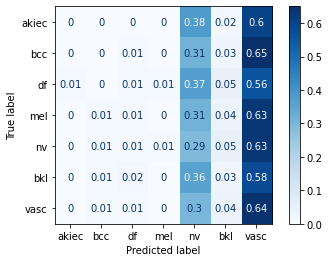

In [31]:
################################################################### Generate a classification report
classes = ['akiec', 'bcc', 'df', 'mel', 'nv','bkl', 'vasc']
report = classification_report_imbalanced(y_true_index, y_pred_index, target_names=classes)
print(report)

#################################################################### Generate Confusion matrix
cm = confusion_matrix(y_true_index, y_pred_index,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = np.round(cm,2), display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()